### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> DATA LOADING AND PREPROCESSING

Importing the necessary libraries and laoding the data to have a preview of it. 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("data/T-20 World cup 2022.csv")
data.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

### **Summary Statistics**

In [4]:
data.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,5.510000e+02,551.000000,551.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.216881e+05,2.172265,0.031654,14.684755,0.641042,5.691470e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.287888e+05,1.039511,0.182317,9.366489,0.833070,3.305531e+05,16.466801,11.707343
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,7.000000,0.000000,3.233890e+05,3.000000,5.000000
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.420230e+05,2.000000,0.000000,13.000000,0.000000,4.824780e+05,9.000000,10.000000
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.229430e+05,3.000000,0.000000,20.000000,1.000000,8.337770e+05,21.000000,19.000000
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


The dataset has 9814 rows and 44 columns 

### **Dropping of Columns**

The columns below have more than three-quarter null values we therefore are going to drop them 

In [5]:
data = data.drop(columns = ["wicket_id", "wkt_batsman_name", "wkt_bowler_name", "wkt_batsman_runs", "wkt_batsman_balls", "wkt_text", "preText", "postText"])
data.shape

(9814, 36)

### **Duplicate Values**

In [6]:
print(f"There are {data.duplicated().sum()} duplicated values in the train set")

There are 1 duplicated values in the train set


In [7]:
dup = data[data.duplicated(keep = False) == True]
dup

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,isRetiredHurt,text
7796,26010,1298143,NED v SL,SL,NED,NED,2,7,1,4,...,0,0,784375.0,Lahiru Kumara,2.0,0.0,15.0,1.0,False,<b>Pulled to square leg first up!</b> This was...
7797,26010,1298143,NED v SL,SL,NED,NED,2,7,1,4,...,0,0,784375.0,Lahiru Kumara,2.0,0.0,15.0,1.0,False,<b>Pulled to square leg first up!</b> This was...


In [8]:
data = data.drop_duplicates()
print(f"There are {data.duplicated().sum()} duplicated values in the train set")

There are 0 duplicated values in the train set


### **Null Values**

In [9]:
data.isnull().sum()

comment_id           0
match_id             0
match_name           0
home_team            0
away_team            0
current_innings      0
innings_id           0
over                 0
ball                 0
runs                 0
shortText            0
isBoundary           0
isWide               0
isNoball             0
batsman1_id          0
batsman1_name        0
batsman1_runs        0
batsman1_balls       0
bowler1_id           0
bowler1_name         0
bowler1_overs        0
bowler1_maidens      0
bowler1_runs         0
bowler1_wkts         0
batsman2_id          0
batsman2_name        0
batsman2_runs        0
batsman2_balls       0
bowler2_id         526
bowler2_name       526
bowler2_overs      526
bowler2_maidens    526
bowler2_runs       526
bowler2_wkts       526
isRetiredHurt        0
text                28
dtype: int64

In [10]:
data = data.dropna()
data.isnull().sum()

comment_id         0
match_id           0
match_name         0
home_team          0
away_team          0
current_innings    0
innings_id         0
over               0
ball               0
runs               0
shortText          0
isBoundary         0
isWide             0
isNoball           0
batsman1_id        0
batsman1_name      0
batsman1_runs      0
batsman1_balls     0
bowler1_id         0
bowler1_name       0
bowler1_overs      0
bowler1_maidens    0
bowler1_runs       0
bowler1_wkts       0
batsman2_id        0
batsman2_name      0
batsman2_runs      0
batsman2_balls     0
bowler2_id         0
bowler2_name       0
bowler2_overs      0
bowler2_maidens    0
bowler2_runs       0
bowler2_wkts       0
isRetiredHurt      0
text               0
dtype: int64

### **Outliers**

In [11]:
# Create a function to check outliers
def check_outliers(data, columns):
 for column in columns:
    # Calculate IQR (Interquartile Range)
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
    # Define lower and upper thresholds
    lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
    upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
    # Find outliers
    outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
    # Print the count of outliers
    print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ["number"])
check_outliers(data, columns_to_check)

comment_id
Number of outliers: 0

match_id
Number of outliers: 0

innings_id
Number of outliers: 0

over
Number of outliers: 0

ball
Number of outliers: 0

runs
Number of outliers: 1304

batsman1_id
Number of outliers: 0

batsman1_runs
Number of outliers: 335

batsman1_balls
Number of outliers: 256

bowler1_id
Number of outliers: 0

bowler1_overs
Number of outliers: 0

bowler1_maidens
Number of outliers: 213

bowler1_runs
Number of outliers: 74

bowler1_wkts
Number of outliers: 236

batsman2_id
Number of outliers: 0

batsman2_runs
Number of outliers: 303

batsman2_balls
Number of outliers: 249

bowler2_id
Number of outliers: 0

bowler2_overs
Number of outliers: 0

bowler2_maidens
Number of outliers: 281

bowler2_runs
Number of outliers: 127

bowler2_wkts
Number of outliers: 330



In [12]:
data.shape

(9259, 36)

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> EXPLORATORY DATA ANALYSIS

### **Histogram Summary**

In [13]:
# # Segragate numerical columns
# num_cols = data[["over", "ball", "runs", "batsman1_runs", "batsman1_balls", "bowler1_overs", "bowler1_maidens", "bowler1_runs", "bowler1_wkts", "batsman2_runs", "batsman2_balls", "bowler2_overs", "bowler2_maidens", "bowler2_runs", "bowler2_wkts"]]

# # Set up subplots
# fig, axes = plt.subplots(nrows = len(num_cols), ncols = 3, figsize = (10, 8))

# # Plot histograms for each numerical column
# for i, column in enumerate(num_cols):
#     sns.histplot(data = data, x = column, kde = True, ax = axes[i])
#     axes[i].set_title(f'Histogram of {column}')

# # Adjust layout
# plt.tight_layout()
# plt.show()


### **Boxplot Summary**

In [14]:
# num_cols = data[["over", "ball", "runs", "batsman1_runs", "batsman1_balls", "bowler1_overs", "bowler1_maidens", "bowler1_runs", "bowler1_wkts", "batsman2_runs", "batsman2_balls", "bowler2_overs", "bowler2_maidens", "bowler2_runs", "bowler2_wkts"]]

# # Set up subplots
# fig, axes = plt.subplots(nrows = len(num_cols), ncols = 3, figsize = (10, 8))

# # Plot boxplots for each numerical column
# for i, column in enumerate(num_cols):
#     sns.boxplot(data = data, y = column, ax = axes[i])
#     axes[i].set_title(f'Boxplot of {column}')

# # Adjust layout
# plt.tight_layout()
# plt.show()

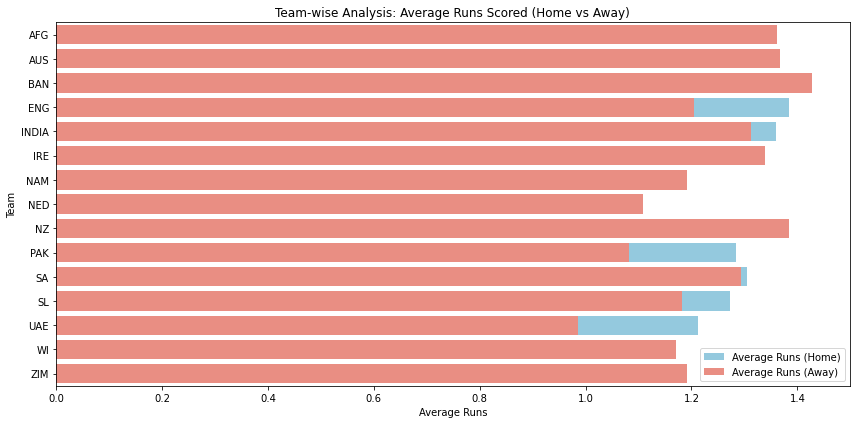

In [15]:
# Aggregate data by home team and calculate mean runs and wickets
home_team_performance = data.groupby('home_team')[['runs']].mean().reset_index()

# Aggregate data by away team and calculate mean runs and wickets
away_team_performance = data.groupby('away_team')[['runs']].mean().reset_index()

# Merge home and away team performance data
team_performance = pd.concat([home_team_performance, away_team_performance], ignore_index=True)

# Plot team-wise analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=team_performance, x='runs', y='home_team', color='skyblue', label='Average Runs (Home)')
sns.barplot(data=team_performance, x='runs', y='away_team', color='salmon', label='Average Runs (Away)')
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.title('Team-wise Analysis: Average Runs Scored (Home vs Away)')
plt.legend()
plt.tight_layout()
plt.show()
